<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/Assignment_U2_S1_M1_(Week_5%2C_Day_1)_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [✓] Look at the data. Choose a feature, and plot its relationship with the target.
- [✓] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [✓] Define a function to make new predictions and explain the model coefficient.
- [✓] Organize and comment your code.

> [✓] Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

**Setup and get data:**

In [0]:
# Import libraries:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Checks if you're in Google CoLab:
if 'google.colab' in sys.modules:
  # --> Fills URL for data file (in GitHub repo for this unit):
  DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

In [0]:
# Read New York City apartment rental listing data into dataframe:
import pandas as pd
housing_data = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert housing_data.shape == (49352, 34)

**Data Prep.:**

In [0]:
# Remove outliers: 
# the most extreme 0.1% prices,
# the most extreme 0.1% of latitudes (farther from the zone considered)
# the most extreme 0.1% of longitudes (farther from the zone considered)
housing_data = housing_data[(housing_data['price'] >= housing_data['price'].quantile(0.001)) & (housing_data['price'] <= housing_data['price'].quantile(0.999)) & 
        (housing_data['latitude'] >= housing_data['latitude'].quantile(0.001)) & (housing_data['latitude'] <= housing_data['latitude'].quantile(0.999)) &
        (housing_data['longitude'] >= housing_data['longitude'].quantile(0.001)) & (housing_data['longitude'] <= housing_data['longitude'].quantile(0.999))]

In [0]:
# Change to right data types:
housing_data['created'] = pd.to_datetime(housing_data['created'])

In [0]:
# Drop text columns we don't need that have lots of NaN values:
housing_data = housing_data.drop(columns=['description', 'display_address', 'street_address'])

In [0]:
# Separate into training and test datasets:
training, test = train_test_split(housing_data, train_size=0.50, test_size=0.50, random_state=27)

**Baseline:  Dummy Mean:  Predict price will is always the mean**

In [447]:
# Train Dummy Baseline (mean) model:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')

features = ['bedrooms']
target = 'price'

# Train (fit) the model:
model.fit(training[features], training[target])

DummyRegressor(constant=None, quantile=None, strategy='mean')

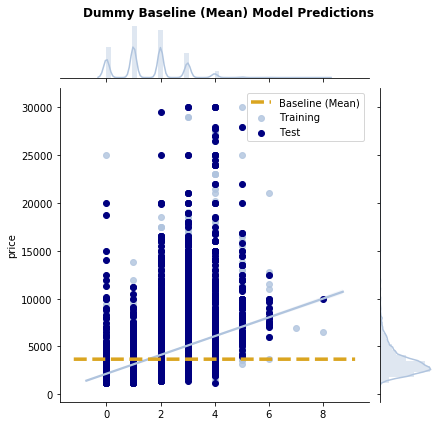

Mean absolute error (MAE) of this model:
Training set error: 1306.0
Test set error: 1291.7


In [448]:
# Plot scatter plot of training and test sets, to visualize better:
ax = sns.jointplot(data=training, x=features, y=target, color='lightsteelblue', kind='reg', dropna=False, label='Training')
plt.scatter(x=test[features], y=test[target], color='navy', label='Test')

axes = plt.gca()
x_values = [i/100 for i in range(int(axes.get_xlim()[0] * 100), int(axes.get_xlim()[1] * 100))]

# Get model predictions, and plot them as a line on top:
predictions = model.predict(x_values)
plt.plot(x_values, predictions, linewidth=3.5, linestyle='--', color='goldenrod', label='Baseline (Mean)')

# Format chart:
ax.fig.suptitle('Dummy Baseline (Mean) Model Predictions', fontweight='bold')
ax.fig.subplots_adjust(top=0.94)
plt.legend(loc='upper right')
plt.show()

# Calculate and print error (MAE) for training data:
y_pred = model.predict(training[features])
y_true = training[target]
training_error = mean_absolute_error(y_true, y_pred)
print('Mean absolute error (MAE) of this model:')
print('Training set error:', round(training_error, 1))

# Calculate and print error (MAE) for test data:
y_pred = model.predict(test[features])
y_true = test[target]
test_error = mean_absolute_error(y_true, y_pred)
print('Test set error:', round(test_error, 1))

In [0]:
# # Backup in matplotlib (only):

# # Plot scatter plot of training and test sets:
# plt.scatter(x=training[features], y=training[target], color='lightsteelblue')
# plt.scatter(x=test[features], y=test[target], color='navy')

# axes = plt.gca()
# x_values = [i/100 for i in range(int(axes.get_xlim()[0] * 100), int(axes.get_xlim()[1] * 100))]

# # Get model predictions, and plot them as a line on top:
# predictions = model.predict(x_values)
# plt.plot(x_values, predictions)

# plt.show()

**Linear Regression Model:  1 Feature**

In [450]:
# Train linear regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train (fit) the model:
model.fit(training[features], training[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

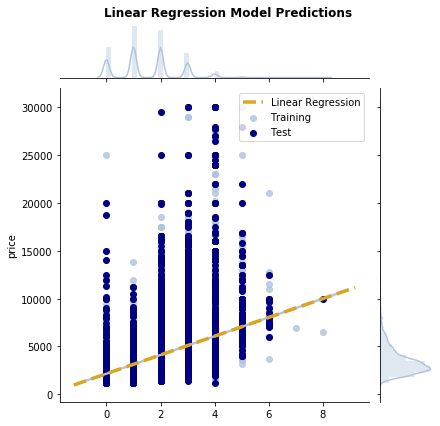

The equation for our regression line is
: y =  979.8087778401455 * x +  2150.7905607200446 

Mean absolute error (MAE) of this model:
Training set error: 1082.4
Test set error: 1059.3


In [451]:
# Plot scatter plot of training and test sets, to visualize better:
ax = sns.jointplot(data=training, x=features, y=target, color='lightsteelblue', kind='reg', dropna=False, label='Training')
plt.scatter(x=test[features], y=test[target], color='navy', label='Test')

axes = plt.gca()
x_values = [[i/100] for i in range(int(axes.get_xlim()[0] * 100), int(axes.get_xlim()[1] * 100))]  # Need to put [i/100] in brackets to put it in 2 dimensions instead of 1, otherwise sklearn model won't work (returns error due to mismatched dimensions) because differeent # of dimensions from the training data (which had 2 dims).

# Get model predictions, and plot them as a line on top:
predictions = model.predict(x_values)
plt.plot(x_values, predictions, linewidth=3.5, linestyle='--', color='goldenrod', label='Linear Regression')

# Format chart:
ax.fig.suptitle('Linear Regression Model Predictions', fontweight='bold')
ax.fig.subplots_adjust(top=0.94)
plt.legend(loc='upper right')
plt.show()

# Get the coefficients, and print the equation for the line:
m_value = model.coef_[0]
b_value = model.intercept_
print('The equation for our regression line is\n: y = ', m_value, '* x + ', b_value, '\n')

# Calculate and print error (MAE) for training data:
y_pred = model.predict(training[features])
y_true = training[target]
training_error = mean_absolute_error(y_true, y_pred)
print('Mean absolute error (MAE) of this model:')
print('Training set error:', round(training_error, 1))

# Calculate and print error (MAE) for test data:
y_pred = model.predict(test[features])
y_true = test[target]
test_error = mean_absolute_error(y_true, y_pred)
print('Test set error:', round(test_error, 1))

In [0]:
# Check:  Our linear regression model above looks like it matches Seaborn's 
# linear (from jointplot kind='reg') regression line exactly, so it looks like 
# our model checks out.

**"Define a function to make new predictions and tell us the model coefficients":**

In [0]:
# Define new function that returns our linear regression model's predicted 
# rent(s) for apartment(s) with the number of bedrooms fed in as an input. 
# Accepts ints, floats (returns 1 price) or lists, arrays or series (returns 
# array of corresponding prices).  Returns list of [price(s), slope, intercept].

def predict_price(bedrooms):
  # bedrooms = round(bedrooms, 0)  # Technically should only predict price values at whole number intervals for bedrooms...
  slope = model.coef_[0]
  intercept = model.intercept_
  if isinstance(bedrooms, (int, float)):
    predicted_price = model.predict([[bedrooms]])  # Put the input number (bedrooms) in 2D, because we trained the sklearn linear regressor on with features as a dataframe (2D).
    print('Predicted monthly rent for a house with ', bedrooms, 'bedrooms in this neighborhood: \n$', round(predicted_price[0], 2))
    print('Each additional bedroom you want will increase your rent by an avg. of approx.: \n$', round(slope, 2), '\n')
    return [predicted_price[0], slope, intercept]
  elif isinstance(bedrooms, (list, np.ndarray, pd.core.series.Series)):
    predicted_price = model.predict(pd.DataFrame(bedrooms))  # Put the input (bedrooms) in 2D, because we trained the sklearn linear regressor on with features as a dataframe (2D).
    print('Predicted monthly rent (in USD) for a house with the input numbers of bedrooms in this neighborhood:\n', predicted_price, '\n')
    print('Each additional bedroom you want will increase your rent by an avg. of approx.: \n$', round(slope, 2), '\n')
    return [predicted_price, slope, intercept]
  elif isinstance(bedrooms, (pd.core.frame.DataFrame)):
    return "Error:  Expected <=2 dimensions, but received 3."

In [668]:
# Test above function with int:
bedrooms = 5
predict_price(bedrooms)

Predicted monthly rent for a house with  5 bedrooms in this neighborhood: 
$ 7049.83
Each additional bedroom you want will increase your rent by an avg. of approx.: 
$ 979.81 



[7049.834449920772, 979.8087778401455, 2150.7905607200446]

In [669]:
# Test above function with array of different numbers of bedrooms:
bedrooms = np.array([1, 2, 3, 4, 5, 6])
predict_price(bedrooms)

Predicted monthly rent (in USD) for a house with the input numbers of bedrooms in this neighborhood:
 [3130.59933856 4110.4081164  5090.21689424 6070.02567208 7049.83444992
 8029.64322776] 

Each additional bedroom you want will increase your rent by an avg. of approx.: 
$ 979.81 



[array([3130.59933856, 4110.4081164 , 5090.21689424, 6070.02567208,
        7049.83444992, 8029.64322776]), 979.8087778401455, 2150.7905607200446]

**Stretch:  Linear Regression with 2 Features**
(even though there aren't really 2 applicable continuous features in this dataset...)

In [0]:
features = ['bedrooms', 'latitude', 'longitude']
target = 'price'

In [672]:
# Train linear regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train (fit) the model:
model.fit(training[features], training[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [698]:
# # Plot scatter plot of training and test sets, to visualize better:
# ax = sns.jointplot(data=training, x=features, y=target, hue='deep', kind='reg', dropna=False, label='Training')
# # plt.scatter(x=test[features], y=test[target], color='navy', label='Test')

# axes = plt.gca()
# x_values = [[i/100] for i in range(int(axes.get_xlim()[0] * 100), int(axes.get_xlim()[1] * 100))]  # Need to put [i/100] in brackets to put it in 2 dimensions instead of 1, otherwise sklearn model won't work (returns error due to mismatched dimensions) because differeent # of dimensions from the training data (which had 2 dims).

# # Get model predictions, and plot them as a line on top:
# predictions = model.predict(x_values)
# plt.plot(x_values, predictions, linewidth=3.5, linestyle='--', color='goldenrod', label='Linear Regression')

# # Format chart:
# ax.fig.suptitle('Linear Regression Model Predictions', fontweight='bold')
# ax.fig.subplots_adjust(top=0.94)
# plt.legend(loc='upper right')
# plt.show()

# Get the coefficients, and print the equation for the line:
m_value = model.coef_
b_value = model.intercept_
print('The equation for our regression line is: \ny = ')
for feature in range(len(features)):
  print(m_value[feature], '* (x', feature, ') \n+ ')
print(b_value, '\n')

# Calculate and print error (MAE) for training data:
y_pred = model.predict(training[features])
y_true = training[target]
training_error = mean_absolute_error(y_true, y_pred)
print('Mean absolute error (MAE) of this model:')
print('Training set error:', round(training_error, 1))

# Calculate and print error (MAE) for test data:
y_pred = model.predict(test[features])
y_true = test[target]
test_error = mean_absolute_error(y_true, y_pred)
print('Test set error:', round(test_error, 1))

The equation for our regression line is: 
y = 
1004.12261186312 * (x 0 ) 
+ 
3587.13982869949 * (x 1 ) 
+ 
-19540.926333307114 * (x 2 ) 
+ 
-1589563.473620545 

Mean absolute error (MAE) of this model:
Training set error: 997.8
Test set error: 977.0
